In [13]:
import parse
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [14]:
datafiles = [
    'data/very_large_monolayer_0.0050_EF_cubic_3.txt',
    'data/very_large_monolayer_0.0063_EF_pwquad_3.txt',
    'data/very_large_monolayer_0.0122_EF_GLS_3.txt',
    'data/very_large_monolayer_0.0191_AB_cubic_3.txt',
    'data/very_large_monolayer_0.0238_MD_cubic_3.txt',
    'data/very_large_monolayer_0.0298_AB_cubic_2.txt',
    'data/very_large_monolayer_0.0373_AB_pwquad_3.txt',
    'data/very_large_monolayer_0.0373_MD_pwquad_3.txt',
    'data/very_large_monolayer_0.0466_AB_pwquad_2.txt',
    'data/very_large_monolayer_0.0466_EF_cubic_2.txt',
    'data/very_large_monolayer_0.0466_MD_cubic_2.txt',
    'data/very_large_monolayer_0.0582_AB_GLS_3.txt',
    'data/very_large_monolayer_0.0582_MD_GLS_3.txt',
    'data/very_large_monolayer_0.0728_AB_GLS_2.txt',
    'data/very_large_monolayer_0.0728_EF_pwquad_2.txt',
    'data/very_large_monolayer_0.0728_MD_pwquad_2.txt',
    'data/very_large_monolayer_0.1137_EF_GLS_2.txt',
    'data/very_large_monolayer_0.1421_MD_GLS_2.txt',
]

In [15]:
def ms2s(ms):
    """
    Convert (min, s) tuple to s
    """
    return 60*ms[0] + ms[1]

In [16]:
data = {}

for filename in datafiles:
    exp, _dt, solver, force, err = parse.parse("{}_{:g}_{}_{}_{}.txt", filename.split('/')[-1])
    with open(filename, 'r') as f:
        data[(exp, solver, force, err)] = [
                ms2s(parse.parse("{:g}m{:g}s", line))
                for line in f.readlines()]

In [17]:
solvers = ["EF", "AB", "MD"]
exp = "very_large_monolayer"
forces = ["cubic", "pwquad", "GLS"]
err = '3'

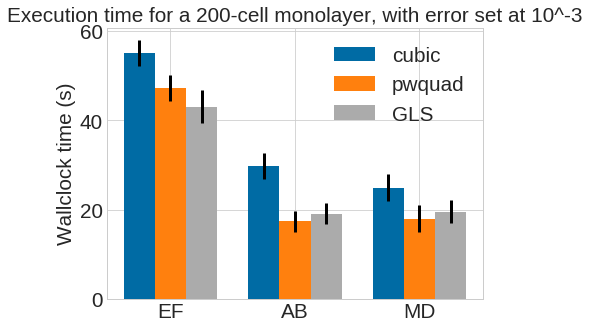

In [19]:
partial_mean = {force: [
        np.mean(v)
        for v in [data[(exp, solver, force, err)] for solver in solvers]]
    for force in forces}

partial_std = {force: [
        np.std(v)
        for v in [data[(exp, solver, force, err)] for solver in solvers]]
    for force in forces}

barwidth = 0.25
pos = [np.arange(len(solvers))]
for _ in range(len(forces)-1):
    pos.append(pos[-1] + barwidth)

for p, force in zip(pos, forces):
    plt.bar(p, partial_mean[force],
            yerr=partial_std[force],
            width=barwidth, label=force)

plt.xticks(pos[1], solvers)

plt.title(f"Execution time for a 200-cell monolayer, with error set at 10^-3")
plt.legend(loc=0)
plt.ylabel("Wallclock time (s)")
plt.savefig(f"{exp}-{err}.pdf", bbox_inches='tight')